## Question 3 :<br>

### What are the best possible neighborhoods from a business aspect based on price only? <br>
<br>

Importing the packages that we will need and load the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

In [2]:
df=pd.read_csv('calendar.csv')

In [3]:
df.shape

(1393570, 4)

In [4]:
df.head(10)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


There seems to be a lot of null values, lets see if they're only in one column:

In [5]:
df.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

Lets see if the null values correspond to the listing being unavailable, we will check that by identifying the unique values for the available column:

In [6]:
df.available.value_counts()

t    934542
f    459028
Name: available, dtype: int64

The numbers seem to match perfectly, which means that the null values are not missing data but they have a meaning which is the unit being not available

Now lets look at the format of each column:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


Changing date to datetime format to be able to subset it better:

In [8]:
df['date']=pd.to_datetime(df['date'])

Changing the t and f values in the available column to numbers to be able to aggregate it:

In [9]:
dic={'t':1, 'f':0}
df['available']=df['available'].map(dic)

lets check the average availability per listing during the year:

In [10]:
lis1=df.groupby(['listing_id'])['available'].sum().median()

lis1

308.0

Lets create columns for year, month and day in case we need it later:

In [11]:
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day


Changing the price to float to be able to compute it:

In [14]:
def numeric_converter(df):
        """" 
        Input : a dataframe or a column of strings
        Output: the dataframe or the column as a number without any other strings next to it"""

        df=df.str.strip('% $ ,')
        df=df.str.replace(',', '')
        df=pd.to_numeric(df,downcast='float')
        return df

df['price']=numeric_converter(df['price'])

Lets create a function that helps in plotting values against time, in this case "months":

In [15]:
month=range(1,13,1)
def target(par1,df):
    """"
    Input:
    
    Par1: a name of a numeric column
    df: the name of the dataframe the column belongs to
    
    Output: 
    y: a list that contains the average column values for each month
    """
    y=[]
    for i in range(1,13,1):
           y.append(df[df['date'].dt.month==i][par1].mean())    
    
    return y

Plotting the average ratio of the units available to all the units throughout the year:

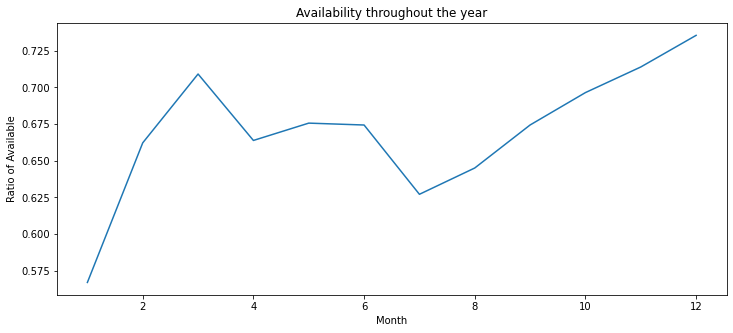

In [62]:
plt.figure(figsize=(12, 5))
plt.plot(month,target('available',df))

plt.xlabel('Month')
plt.ylabel('Ratio of Available')
plt.title('Availability throughout the year')
plt.show()

Plotting the average price throughout the year:

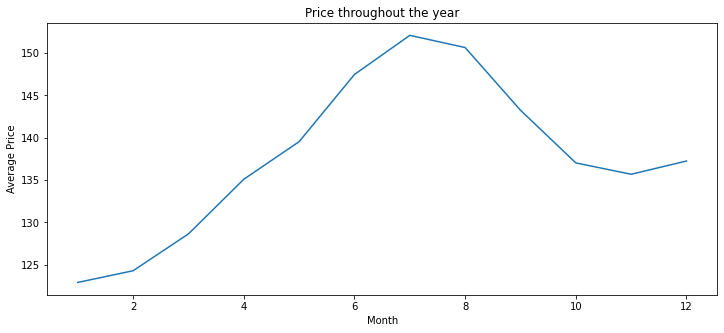

In [64]:
plt.figure(figsize=(12, 5))
plt.plot(month,target('price',df))

plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Price throughout the year')
plt.show()

Now lets reuse the above function but adapt it to be able to plot throughout weeks instead of months:

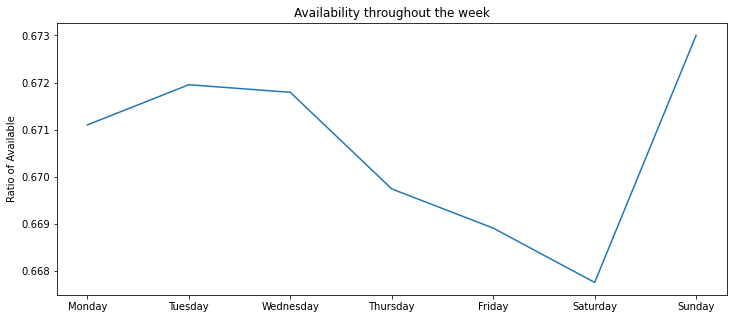

In [66]:
week=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
def target2(par1,df):
    """"
    Input:
    
    Par1: a name of a numeric column
    df: the name of the dataframe the column belongs to
    
    Output: 
    y: a list that contains the average column values for each week
    """
    y=[]
    for i in range(0,7,1):
           y.append(df[df['date'].dt.dayofweek==i][par1].mean())       
    return y
plt.figure(figsize=(12, 5))
plt.plot(week,target2('available',df))
#plt.xlabel('Week')
plt.ylabel('Ratio of Available')
plt.title('Availability throughout the week')
plt.show()

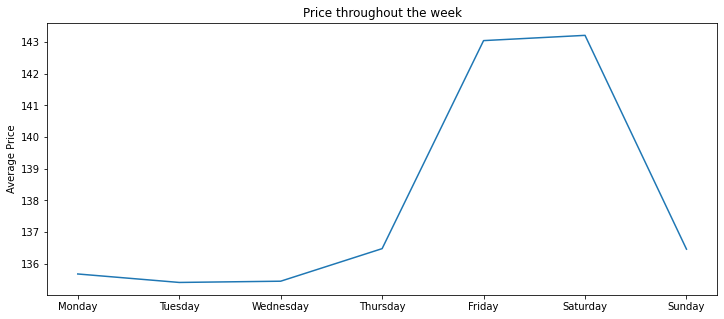

In [67]:
plt.figure(figsize=(12, 5))
plt.plot(week,target2('price',df))
#plt.xlabel('Week')
plt.ylabel('Average Price')
plt.title('Price throughout the week')
plt.show()

Now lets import the location of the listings from the listings table, along with the id to assure the join was successful:

In [19]:
df_list=pd.read_csv('listings.csv')



df_list=df_list[['id','zipcode','neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed']]

df3=pd.merge(df,df_list, left_on='listing_id',right_on='id')

In [20]:
df3.head()

,listing_id,date,available,price,year,month,day,id,zipcode,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed
0,241032,2016-01-04,1,85.0,2016,1,4,241032,98119,Queen Anne,West Queen Anne,Queen Anne
1,241032,2016-01-05,1,85.0,2016,1,5,241032,98119,Queen Anne,West Queen Anne,Queen Anne
2,241032,2016-01-06,0,NaN,2016,1,6,241032,98119,Queen Anne,West Queen Anne,Queen Anne
3,241032,2016-01-07,0,NaN,2016,1,7,241032,98119,Queen Anne,West Queen Anne,Queen Anne
4,241032,2016-01-08,0,NaN,2016,1,8,241032,98119,Queen Anne,West Queen Anne,Queen Anne


Aggregating the number of available units by neighbourhood group:

In [21]:
df3.groupby('neighbourhood_group_cleansed')['available'].sum().sort_values(ascending=False)

neighbourhood_group_cleansed
Other neighborhoods    194661
Capitol Hill           132668
Downtown               125725
Central Area            90556
Queen Anne              66804
Ballard                 58115
West Seattle            51950
Rainier Valley          38914
University District     33148
Beacon Hill             30270
Delridge                21545
Northgate               21105
Lake City               18801
Cascade                 18717
Magnolia                17248
Seward Park             10921
Interbay                 3394
Name: available, dtype: int64

The average price per neighbourhood group:

In [22]:
df3.groupby('neighbourhood_group_cleansed')['price'].mean().sort_values(ascending=False)

neighbourhood_group_cleansed
Magnolia               198.694336
Downtown               187.343048
Queen Anne             176.117889
Cascade                154.033173
West Seattle           148.155807
Central Area           134.883728
Capitol Hill           134.671890
Ballard                125.905983
Other neighborhoods    125.622017
Interbay               118.421036
Seward Park            111.110336
University District    104.709938
Beacon Hill            100.668777
Rainier Valley         100.104927
Lake City               94.518593
Northgate               93.455528
Delridge                90.926941
Name: price, dtype: float32

The average price per nighbourhood:

In [23]:
df3.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

neighbourhood
Fairmount Park         370.000000
Portage Bay            250.885284
Industrial District    245.875443
Windermere             227.516098
Alki                   226.410736
                          ...    
Holly Park              78.184593
Georgetown              78.025108
Riverview               77.346275
Olympic Hills           66.256790
Roxhill                 60.000000
Name: price, Length: 81, dtype: float32

In [101]:
df3[(df3['neighbourhood']=='Portage Bay')& (df3['neighbourhood_group_cleansed']=='Cascade')]['price'].count()

544

In [53]:
df3[(df3['neighbourhood']=='Portage Bay')& (df3['neighbourhood_group_cleansed']=='Capitol Hill')]['price'].count()

3248

In [102]:
df3[(df3['neighbourhood']=='Portage Bay')& (df3['neighbourhood_group_cleansed']=='Capitol Hill')]['price'].mean()

253.82728576660156

In [50]:
df3[(df3['neighbourhood']=='Portage Bay')& (df3['neighbourhood_group_cleansed']=='Cascade')]['price'].mean()

233.31985473632812

The following is a function that plots the availability vs price change per either neighbourhood group or neighbourhood:

In [145]:
def plott(loc_group,loc):
    
    df_plot=df3[df3[loc_group]==loc]
    
    
    
    fig,ax = plt.subplots()
    fig.set_figheight(5)
    fig.set_figwidth(12)
     
    
    ax.plot(month, target('available',df_plot), color="mediumblue", marker="o", label="Availability ratio")
    
    ax.set_ylabel("Availability ratio/year",fontsize=11)
    
    ax2=ax.twinx()
    
    ax2.plot(month, target('price',df_plot),color="firebrick",marker="o", label="Price")
    
    ax2.set_ylabel("Average Price $",fontsize=11)
    ax2.legend(loc=0)
    ax.legend(loc=2)
    
    ax.set_xlabel('Month')
    
   
    plt.title('Availability throughout the year')
    plt.show()
    

The availability will be checked on the left y-axis and the prices will be checked on the right y-axis:

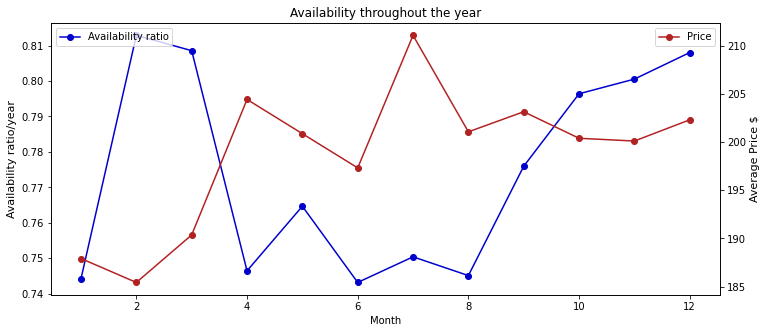

In [146]:
plott('neighbourhood_group_cleansed','Magnolia')

In [143]:
df3[df3['neighbourhood_group_cleansed']=='Magnolia']['neighbourhood'].value_counts()

Magnolia    19345
Name: neighbourhood, dtype: int64

Looks like only one neighborhood is listed under 'Magnolia' which does not make it the highest priced neighborhood, instead we will look at the highest priced neighborhood directly

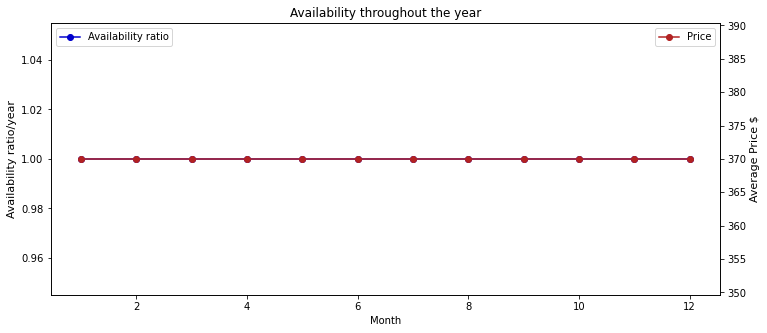

In [147]:
plott('neighbourhood','Fairmount Park')

This means there are constant number of available units probably just one, lets check:

In [27]:
df3[df3['neighbourhood']=='Fairmount Park']['listing_id'].value_counts()

692080    365
Name: listing_id, dtype: int64

Which means that is was on the market for that price but never booked throughout the year

So lets check the second highest neighborhood:

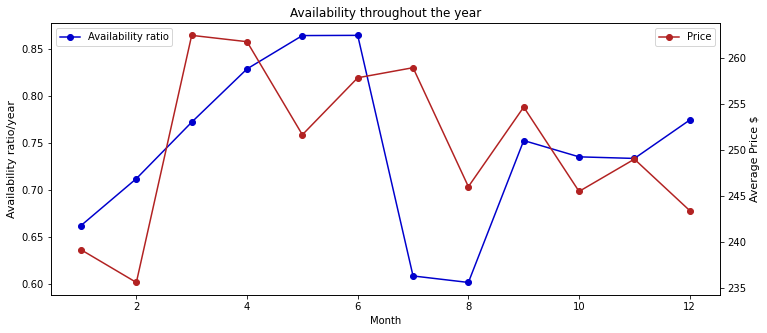

In [148]:
plott('neighbourhood','Portage Bay')

In [29]:
df3[df3['neighbourhood']=='Portage Bay']['listing_id'].nunique()

14

### Answering Question 3:
### Which means that 'Portage Bay' neighbourhood has the highest average price in Seattle

Lets check the third neighborhood as well since the average price difference is $5

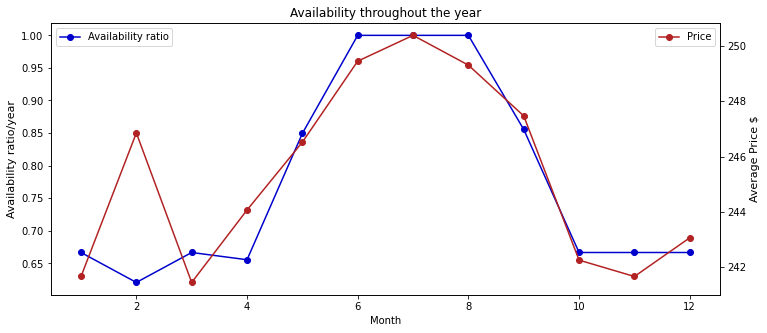

In [149]:
plott('neighbourhood','Industrial District')

In [31]:
df3[df3['neighbourhood']=='Industrial District']['listing_id'].nunique()

3

It shows it has too few listings and they remained available for 2 whole months